<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos

**Nombre:** Paula Daniela Cárdenas Gallardo

**Fecha:** 16 de febrero del 2023

**Expediente** : 733720.
    
**Profesor:** Óscar David Jaramillo Zuluaga.
    
**Link Github**: [github.com](https://github.com/if720960/Tarea3_LXPerez_OAHernandez_PDCardenas)

# Tarea 3: Clase 7

## Enunciado de tarea
> Condensar todos los procedimientos realizados en esta clase donde se implementen los métodos necesarios para crear un correcto flujo de lectura de datos, análisis, ajuste de parámetros, predicción y métricas de errores para un conjunto de datos dado.

> Implementar los métodos y las lógicas que consideren pertinentes, como de igual forma las posibles variables a introducir en el constructor de la clase. Posteriormente, utilizar la clase anteriormente creada para generar un modelo SARIMAX para el siguiente conjunto de datos: [github.com](https://github.com/quaesito/time-series-forecast-sarimax-prophet/blob/master/A4.xlsx?raw=true)

### Ejercicio 1: Condensar todos los procedimientos realizados en esta clase donde se implementen los métodos necesarios para crear un correcto flujo de lectura de datos, análisis, ajuste de parámetros, predicción y métricas de errores para un conjunto de datos dado.

Código de solución estudiante 1

In [ ]:
# Código de solución estudiante 1
.
.
.
.


Código de solución estudiante 2

In [ ]:
# Código de solución estudiante 2
.
.
.
.


Código de solución estudiante 3

In [1]:
# Librerías
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from io import BytesIO
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
class LinearForecast:
    def __init__(self, data):
        self.data = data
        
        
    def read_data(self, file_path, file_type='csv'):
        """
        Función para leer el archivo de datos con formato csv o xlsx
        :param file_path: Liga o ruta con el archivo de interés
        :param file_type: Tipo de extensión del archivo, por default .csv
        """
        if file_type=='csv':
            data = pd.read_csv(file_path)
        elif file_type=='xlsx':
            data = pd.read_excel(file_path, header=0)
        else:
            print('Extensión no válida.')
        return data
    
    
    def split_dataset(self, train_size=0.75):
        """
        Función que se encarga de dividir la data ingresada en datos de entrenamiento y prueba.
        :param div: String con el nombre de la variable objetivo
        """
        div = int(self.data.shape[0]*train_size)
        train = self.data[:div]
        test = self.data[div:]
        return train, test


    def descomposition(self, period, model='additive'):
        """
        Función para descomponer y graficar los datos en tendencia, estacionalidad y residuos
        :param model: aditivo o multiplicativo, por default aditivo
        :param period: periodo de la serie de tiempo
        """
        resultados = seasonal_decompose(self.data, model=model, period=period)
        return resultados
        
        
    def adf_test(self):
        """
        Función para realizar la prueba de Dickey-Fuller
        """
        print("Resultados de la prueba Dickey-Fuller:")
        dftest = adfuller(self.data, autolag="AIC")
        dfoutput = pd.Series(
            dftest[0:4],
            index=[
                "Estadístico de prueba",
                "p-value",
                "#Lags Usados",
                "Observaciones Usadas",
            ],
        )
        for key, value in dftest[4].items():
            dfoutput["Valor Crítico (%s)" % key] = value
        print(dfoutput)
        if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
            print("\u001b[32mEstacionaria\u001b[0m")
        else:
            print("\x1b[31mNo Estacionaria\x1b[0m")
            

    def plot_acf_pac(self, kwargs=dict()):
        """
        Función para visualizar autocorrelación y autocorrelación parcial
        """
        f = plt.figure(figsize=(8,5))
        ax1 = f.add_subplot(121)
        plot_acf(self.data, zero=False, ax=ax1, **kwargs)
        ax2 = f.add_subplot(122)
        plot_pacf(self.data, zero=False, ax=ax2, method='ols', **kwargs)
        plt.show()
    
    
    def param_adjust(self, p, d, q):
        """
        Función para modelar un ARIMA
        :param p: p observado con la función de autocorrelación parcial
        :param d: diferenciaciones necesarias para conseguir estacionariedad
        :param q: q observado con la función de autocorrelación
        """
        model = ARIMA(self.data, order=(p, d, q))
        model_base = model.fit()
        return model_base
    
    
    def model_forecast(self, train, model, horizon):
        """
        Función que predice con el modelo entrenado un horizonte de tiempo
        :param train: datos de entrenamiento
        :param model: modelo entrenado
        :param horizon: periodos que se desean predecir 
        """
        y_h = model.predict(start=train.shape[0], end=train.shape[0]+horizon, dynamic=False).to_frame()
        fig, ax = plt.subplots(figsize = (10, 5))
        train.plot(ax = ax)
        y_h.plot(ax = ax)
        ax.legend(labels = ['data', 'forecast'])
        return y_h
    
    
    def evaluate_performance(self, actual, predicted):
        """
        Función que se encargará de calcular las métricas de error
        :param actual: Valor actual de la serie de tiempo que se desea predecir.
        :param predicted: Valor predecido por el modelo ajustado.
        """
        forecast_error = [actual[i]-predicted[i] for i in range(len(actual))]
        bias = sum(forecast_error) * 1.0/len(actual)
        mae = mean_absolute_error(actual, predicted)
        mse = mean_squared_error(actual, predicted)
        rmse = np.sqrt(mse)
        return forecast_error, bias, mae, mse, rmse

### Ejercicio 2: Implementar los métodos y las lógicas que consideren pertinentes, como de igual forma las posibles variables a introducir en el constructor de la clase. Posteriormente, utilizar la clase anteriormente creada para generar un modelo SARIMAX para el siguiente conjunto de datos: [github.com](https://github.com/quaesito/time-series-forecast-sarimax-prophet/blob/master/A4.xlsx?raw=true)

Código de solución estudiante 1

In [ ]:
# Código de solución estudiante 1
.
.
.
.


Código de solución estudiante 2

In [ ]:
# Código de solución estudiante 2
.
.
.
.


Código de solución estudiante 3

In [3]:
# Cargar datos
liga = 'https://github.com/quaesito/time-series-forecast-sarimax-prophet/blob/master/A4.xlsx?raw=true'
data = pd.read_excel(liga, header=0)
data.head()

,Unnamed: 0,date,year,month,day,hour,GHI (W/m2),DNI (W/m2),DHI (W/m2),Wet bulb temp (C),Dew point temp (C),Energy (kWh)
0,6,1990-01-01,1990,Jan,Mon,6,234,503,78,12.1406,9.7,498.632
1,7,1990-01-01,1990,Jan,Mon,7,448,723,91,13.3250,10.1,720.409
2,8,1990-01-01,1990,Jan,Mon,8,699,959,71,13.3094,9.3,946.154
3,9,1990-01-01,1990,Jan,Mon,9,880,1016,73,13.9375,9.1,987.273
4,10,1990-01-01,1990,Jan,Mon,10,1009,1031,85,14.1141,8.0,1000.230


In [4]:
# Agrupar por hora
data['date'] = data.apply(lambda x:
                          pd.to_datetime('1990-01-01') + 
                          pd.Timedelta(x['hour'], unit='hour'),
                          axis = 1)
data = data.set_index('date')

# Eliminar las variables que no son de interés
data.drop(['Unnamed: 0', 'year', 'month', 'day', 'hour'], axis=1, inplace=True)
data.head()

,GHI (W/m2),DNI (W/m2),DHI (W/m2),Wet bulb temp (C),Dew point temp (C),Energy (kWh)
date,,,,,,
1990-01-01 06:00:00,234,503,78,12.1406,9.7,498.632
1990-01-01 07:00:00,448,723,91,13.3250,10.1,720.409
1990-01-01 08:00:00,699,959,71,13.3094,9.3,946.154
1990-01-01 09:00:00,880,1016,73,13.9375,9.1,987.273
1990-01-01 10:00:00,1009,1031,85,14.1141,8.0,1000.230


Para fines prácticos y académicos, únicamente se predecirá la energía (`Energy (kWh)`).

In [5]:
# Mantener únicamente la energía
data.drop(['GHI (W/m2)', 'DNI (W/m2)', ' DHI (W/m2)', 'Wet bulb temp (C)', 'Dew point temp (C)'], axis=1, inplace=True)
data.head()

,Energy (kWh)
date,
1990-01-01 06:00:00,498.632
1990-01-01 07:00:00,720.409
1990-01-01 08:00:00,946.154
1990-01-01 09:00:00,987.273
1990-01-01 10:00:00,1000.230


In [6]:
# Crear objeto
forecast = LinearForecast(data)

# Partición entrenamiento y prueba
train, test = forecast.split_dataset()

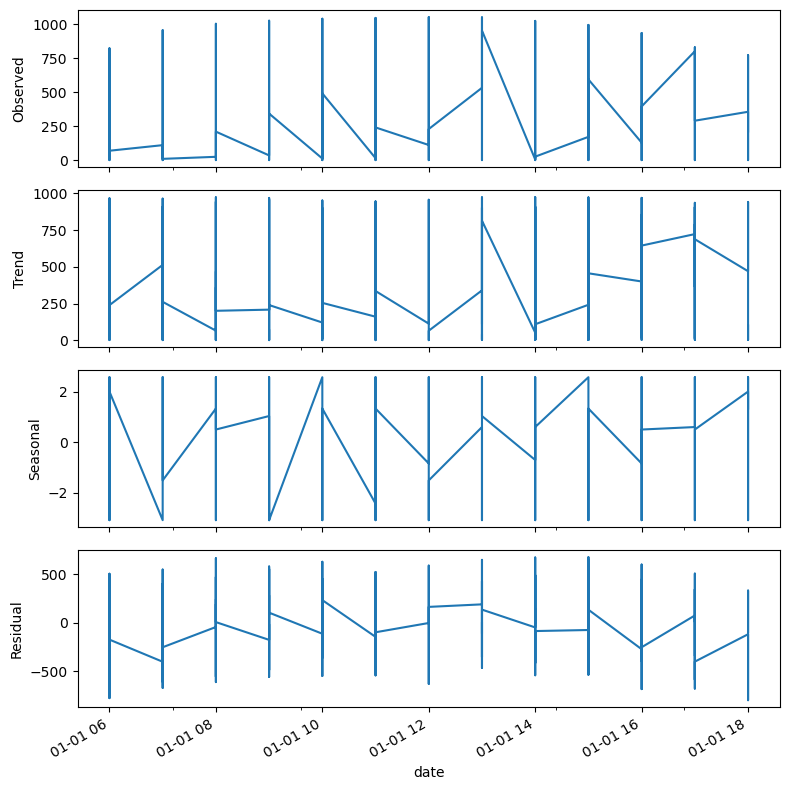

In [7]:
# Descomposición
r = forecast.descomposition(12)
# Gráfica
fig, ax = plt.subplots(4, sharex=True, figsize=(8, 8))
r.observed.plot(ax=ax[0])   # Datos originales
ax[0].set_ylabel('Observed')
r.trend.plot(ax=ax[1])      # Tendencia
ax[1].set_ylabel('Trend')
r.seasonal.plot(ax=ax[2])   # Estacionalidad
ax[2].set_ylabel('Seasonal')
r.resid.plot(ax=ax[3])      # Residuos
ax[3].set_ylabel('Residual')
fig.tight_layout()

In [8]:
# Prueba estacionariedad
forecast.adf_test()

Resultados de la prueba Dickey-Fuller:
Estadístico de prueba      -28.225750
p-value                      0.000000
#Lags Usados                67.000000
Observaciones Usadas     96932.000000
Valor Crítico (1%)          -3.430417
Valor Crítico (5%)          -2.861570
Valor Crítico (10%)         -2.566786
dtype: float64
Estacionaria


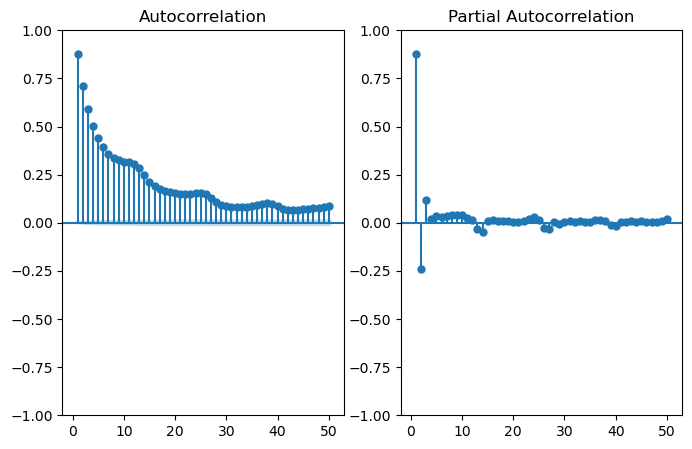

In [9]:
# Autocorrelación
forecast.plot_acf_pac()

In [10]:
# Parámetros
modelo = forecast.param_adjust(1, 0, 3)

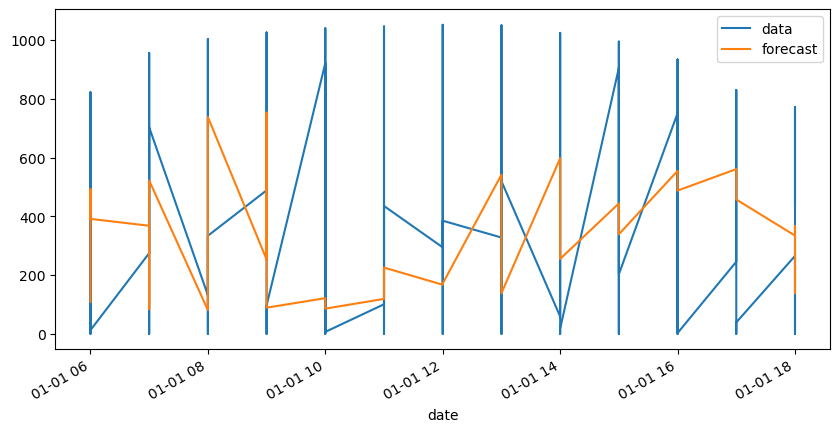

In [11]:
# Forecast
pred = forecast.model_forecast(train, modelo, 30)

In [12]:
# Desempeño
forecast_errors, bias, mae, mse, rmse = forecast.evaluate_performance(test['Energy (kWh)'][24219:], pred['predicted_mean'])
print(f'forecast_errors: {forecast_errors}\nbias: {bias}\nmae: {mae} \nmse: {mse} \nrmse: {rmse}')

forecast_errors: [482.88756302854745, 170.09871368812347, 475.47260321623213, 563.4722303352243, 332.77337102259855, 216.26488208392882, -0.8083666552255266, -42.73295093813553, -292.94241854250015, -459.5881346771441, -304.2284201523337, -470.0653244485401, -344.7554347147243, -176.09969725932672, -251.4343219586876, -292.6792315250018, -412.4699709190638, -242.17997520438377, 14.50601920957267, -96.29043884404896, 178.26528568898928, 718.6661511009361, 686.8362895176748, 600.5599633337029, 452.40042434561514, 370.44618335872485, 590.7261450460865, 427.82237552138366, 332.2453944787926, -132.36686439837467, -540.9544349553439]
bias: 82.38218096075155
mae: 344.29159936028924 
mse: 154441.66077957314 
rmse: 392.99066245850315


### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........